<a href="https://colab.research.google.com/github/suniljangra16/Rice-type-classification-project-using-ANN/blob/main/Rice_type_classification_project_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

device='cuda'if torch.cuda.is_available()else'cpu'

print(device)

cuda


In [2]:
from google.colab import files
uploaded=files.upload()

Saving riceClassification.csv.zip to riceClassification.csv.zip


In [3]:
df=pd.read_csv("riceClassification.csv.zip")

In [4]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
df.isnull().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


In [6]:
df.dropna(inplace=True)
df.drop(columns=['id'],axis=1,inplace=True)

In [7]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [12]:
df['Class'].value_counts()

,count
Class,
1,9985
0,8200


In [15]:
data=df.copy()

for column in data.columns:
  data[column]=data[column]/data[column].abs().max()

data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [17]:
X=np.array(data.iloc[:,:-1])
Y=np.array(data.iloc[:,-1])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [19]:
X_train,X_val,y_train,y_val=train_test_split(X_test,y_test,test_size=0.3,random_state=42)

In [22]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3819, 10)
(1637, 10)
(5456, 10)


In [28]:
class dataset(Dataset):
  def __init__(self,X,Y):
    self.X=torch.tensor(X,dtype=torch.float32).to(device)
    self.Y=torch.tensor(Y,dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self,index):
    return self.X[index],self.Y[index]

In [29]:
training_data=dataset(X_train,y_train)
validation_data=dataset(X_val,y_val)
testing_data=dataset(X_test,y_test)

In [40]:
train_dataloader=DataLoader(training_data,batch_size=32,shuffle=True)
val_dataloader=DataLoader(validation_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(testing_data,batch_size=32,shuffle=True)

In [41]:

HIDDEN_NEURON=10
class MyModel(nn.Module):

  def __init__(self):

    super(MyModel,self).__init__()

    self.input_layer=nn.Linear(X.shape[1],HIDDEN_NEURON)
    self.Linear=nn.Linear(HIDDEN_NEURON,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    x=self.input_layer(x)
    x=self.Linear(x)
    x=self.sigmoid(x)
    return x

model=MyModel().to(device)



In [42]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [43]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(),lr=1e-3)

In [59]:
total_loss_train_plot=[]
total_loss_val_plot=[]
total_acc_train_plot=[]
total_acc_val_plot=[]

epochs=10
for epoch in range(epochs):
  total_loss_train=0
  total_loss_val=0
  total_acc_train=0
  total_acc_val=0

  for data in train_dataloader:
    inputs,labels=data

    prediction=model(inputs).squeeze(1)

    batch_loss=criterion(prediction,labels)

    total_loss_train+=batch_loss.item()

    acc=((prediction).round()==labels).sum().item()
    total_acc_train+=acc

    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

  with torch.no_grad():
    for data in val_dataloader:
      input,labels=data

      prediction=model(input).squeeze(1)

      batch_loss=criterion(prediction,labels)

      total_loss_val+=batch_loss.item()

      acc=((prediction).round()==labels).sum().item()
      total_acc_val+=acc
    total_loss_train_plot.append(round(total_loss_train/1000,4))
    total_loss_val_plot.append(round(total_loss_val/1000,4))

    total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100,4))
    total_acc_val_plot.append(round(total_acc_val/validation_data.__len__()*100,4))



In [60]:
with torch.no_grad():
  total_loss_test=0
  total_acc_test=0
  for data in test_dataloader:
    input,labels=data
    # use 'input' instead of 'inputs' to make predictions
    prediction=model(input).squeeze(1)

    batch_loss_test=criterion(prediction,labels).item()
    total_loss_test+=batch_loss_test

    acc=((prediction).round()==labels).sum().item()
    total_acc_test+=acc

  print("Accuracy:",round(total_acc_test/testing_data.__len__()*100,4))

Accuracy: 98.7903


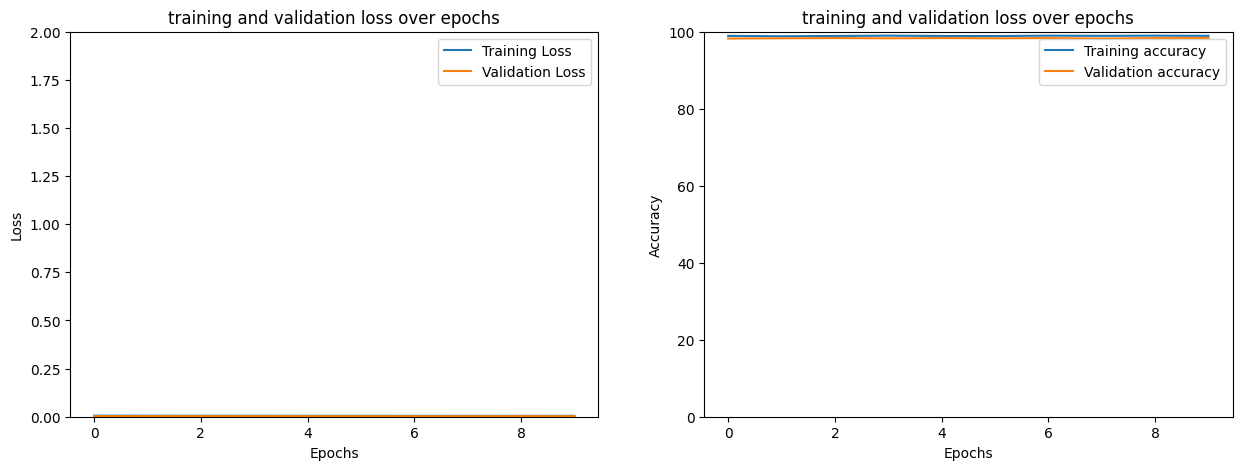

In [61]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axs[0].plot(total_loss_train_plot,label="Training Loss")
axs[0].plot(total_loss_val_plot,label="Validation Loss")
axs[0].set_title("training and validation loss over epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot,label="Training accuracy")
axs[1].plot(total_acc_val_plot,label="Validation accuracy")
axs[1].set_title("training and validation loss over epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()

In [66]:
area = 2353 / df['Area'].abs().max()  # Call the max() method
Major_Axis = 81 / df['MajorAxisLength'].abs().max()  # Call the max() method
Minor_Axis = 42 / df['MinorAxisLength'].abs().max()  # Call the max() method
Eccentricity = 32 / df['Eccentricity'].abs().max()  # Call the max() method
ConvexArea = 12 / df['ConvexArea'].abs().max()  # Call the max() method
EquivDiameter = 33 / df['EquivDiameter'].abs().max()  # Call the max() method
Extent = 98 / df['Extent'].abs().max()  # Call the max() method
Perimeter = 927 / df['Perimeter'].abs().max()  # Call the max() method
Roundness = 677 / df['Roundness'].abs().max()  # Call the max() method
AspectRation = 24 / df['AspectRation'].abs().max()  # Call the max() method

prediction = model(torch.tensor([area, Major_Axis, Minor_Axis, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation], dtype=torch.float32).to(device))

In [67]:
prediction.item()

0.0